In [3]:
%reset -f

from pylabel         import importer
from IPython.display import Image, display

import os
import zipfile

import numpy  as np
import pandas as pd

In [4]:
!pwd

/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets


In [5]:
#Specify path to the coco.json file
path_to_annotations = "/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/coco/annatations.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/coco/images"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="chute_coco")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/home/ning/Data/Dropbox/Working_Directory/tria...,iroccv-t12-raisechute-labelling-20230330-02274...,,0,1280,720,,,116,0,...,,0,,,,0,chute,,,1
1,/home/ning/Data/Dropbox/Working_Directory/tria...,iroccv-t12-raisechute-labelling-20230330-02274...,,0,1280,720,,,936,44,...,,0,,,,3,safety_handrail,,,1
2,/home/ning/Data/Dropbox/Working_Directory/tria...,iroccv-t12-raisechute-labelling-20230330-02274...,,1,1280,720,,,116,0,...,,0,,,,0,chute,,,1
3,/home/ning/Data/Dropbox/Working_Directory/tria...,iroccv-t12-raisechute-labelling-20230330-02274...,,1,1280,720,,,936,44,...,,0,,,,3,safety_handrail,,,1
4,/home/ning/Data/Dropbox/Working_Directory/tria...,iroccv-t12-raisechute-labelling-20230330-02274...,,2,1280,720,,,116,0,...,,0,,,,0,chute,,,1


In [6]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 586
Number of classes: 4
Classes:['chute', 'loco_nose', 'loco_handrail', 'safety_handrail']
Class counts:
safety_handrail    586
chute              465
loco_handrail      377
loco_nose          288
Name: cat_name, dtype: int64
Path to annotations:
/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/coco


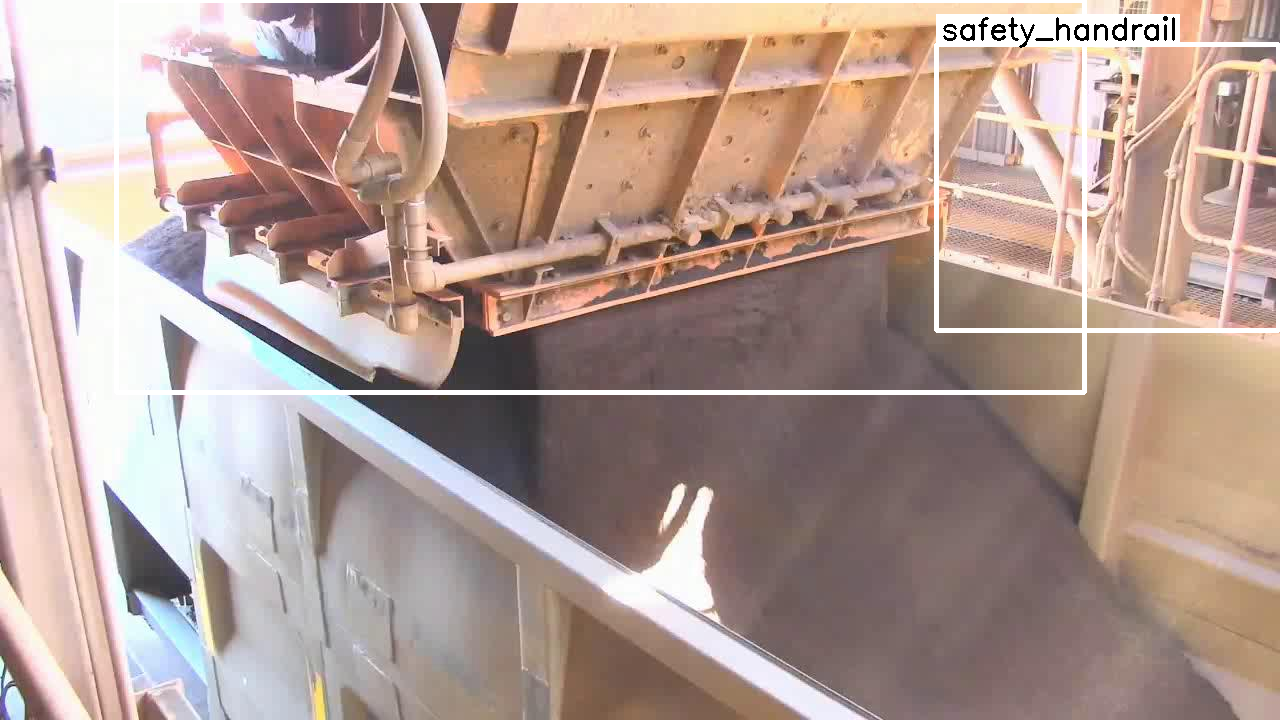

In [7]:
display(dataset.visualize.ShowBoundingBoxes())

In [9]:
!cp -r /home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/coco/images/* /home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/yolo/
dataset.export.ExportToYoloV5(output_path="/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/yolo")[0]


Exporting YOLO files...: 100%|████████████████████████████████████████| 586/586 [00:00<00:00, 801.83it/s]


'/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/dataset.yaml'

In [13]:
# folder path
dir_path = '/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/yolo'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)) != True:
        res.append(path);

res = sorted(res)

folder_name = res

print(folder_name)


['iroccv-t12-raisechute-labelling-20230330-022741543624', 'iroccv-t12-raisechute-labelling-20230330-055224058739', 'iroccv-t12-raisechute-labelling-20230330-062105703514', 'iroccv-t12-raisechute-labelling-20230330-064727721021', 'iroccv-t12-raisechute-labelling-20230330-070517913773', 'iroccv-t12-raisechute-labelling-20230330-071255119290', 'iroccv-t12-raisechute-labelling-20230330-073912470175', 'iroccv-t12-raisechute-labelling-20230330-075116437519', 'iroccv-t12-raisechute-labelling-20230330-080941308128']


In [16]:
df = pd.DataFrame()

for fname in folder_name:
    
    res_2 = []
    
    subfolder_path = dir_path + '/' + fname;
    
    # Iterate directory
    for path in os.listdir(subfolder_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(subfolder_path, path)):
            res_2.append('./' + fname + '/' + path);

    res_2 = sorted(res_2)
    
    df_tmp = pd.DataFrame(res_2, columns = ['file_path'])
    df_tmp['folder_name'] = fname
    df_tmp['file_type'] = df_tmp['file_path'].str[-3:]
    
    df = pd.concat([df, df_tmp], ignore_index=True)

In [17]:
df

,file_path,folder_name,file_type
0,./iroccv-t12-raisechute-labelling-20230330-022...,iroccv-t12-raisechute-labelling-20230330-02274...,jpg
1,./iroccv-t12-raisechute-labelling-20230330-022...,iroccv-t12-raisechute-labelling-20230330-02274...,txt
2,./iroccv-t12-raisechute-labelling-20230330-022...,iroccv-t12-raisechute-labelling-20230330-02274...,jpg
3,./iroccv-t12-raisechute-labelling-20230330-022...,iroccv-t12-raisechute-labelling-20230330-02274...,txt
4,./iroccv-t12-raisechute-labelling-20230330-022...,iroccv-t12-raisechute-labelling-20230330-02274...,jpg
...,...,...,...
1167,./iroccv-t12-raisechute-labelling-20230330-080...,iroccv-t12-raisechute-labelling-20230330-08094...,txt
1168,./iroccv-t12-raisechute-labelling-20230330-080...,iroccv-t12-raisechute-labelling-20230330-08094...,jpg
1169,./iroccv-t12-raisechute-labelling-20230330-080...,iroccv-t12-raisechute-labelling-20230330-08094...,txt
1170,./iroccv-t12-raisechute-labelling-20230330-080...,iroccv-t12-raisechute-labelling-20230330-08094...,jpg


In [18]:
train_filepath = df.loc[ (df['folder_name']!='iroccv-t12-raisechute-labelling-20230330-080941308128') & (df['folder_name']!='iroccv-t12-raisechute-labelling-20230330-075116437519') ][['file_path', 'file_type']]

train_filepath = train_filepath.loc[df['file_type']=='jpg']
train_filepath = train_filepath['file_path']

train_filepath

0      ./iroccv-t12-raisechute-labelling-20230330-022...
2      ./iroccv-t12-raisechute-labelling-20230330-022...
4      ./iroccv-t12-raisechute-labelling-20230330-022...
6      ./iroccv-t12-raisechute-labelling-20230330-022...
8      ./iroccv-t12-raisechute-labelling-20230330-022...
                             ...                        
906    ./iroccv-t12-raisechute-labelling-20230330-073...
908    ./iroccv-t12-raisechute-labelling-20230330-073...
910    ./iroccv-t12-raisechute-labelling-20230330-073...
912    ./iroccv-t12-raisechute-labelling-20230330-073...
914    ./iroccv-t12-raisechute-labelling-20230330-073...
Name: file_path, Length: 458, dtype: object

In [19]:
valid_filepath = df.loc[ (df['folder_name']=='iroccv-t12-raisechute-labelling-20230330-080941308128') | (df['folder_name']=='iroccv-t12-raisechute-labelling-20230330-075116437519') ][['file_path', 'file_type']]

valid_filepath = valid_filepath.loc[df['file_type']=='jpg']
valid_filepath = valid_filepath['file_path']

valid_filepath

916     ./iroccv-t12-raisechute-labelling-20230330-075...
918     ./iroccv-t12-raisechute-labelling-20230330-075...
920     ./iroccv-t12-raisechute-labelling-20230330-075...
922     ./iroccv-t12-raisechute-labelling-20230330-075...
924     ./iroccv-t12-raisechute-labelling-20230330-075...
                              ...                        
1162    ./iroccv-t12-raisechute-labelling-20230330-080...
1164    ./iroccv-t12-raisechute-labelling-20230330-080...
1166    ./iroccv-t12-raisechute-labelling-20230330-080...
1168    ./iroccv-t12-raisechute-labelling-20230330-080...
1170    ./iroccv-t12-raisechute-labelling-20230330-080...
Name: file_path, Length: 128, dtype: object

In [21]:
!rm -rf /home/ning/trial_chute/datasets/yolo/train.txt /home/ning/trial_chute/datasets/yolo/valid.txt
train_filepath.to_csv('/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/yolo/train.txt', header=None, index=None, sep=' ', mode='a')
valid_filepath.to_csv('/home/ning/Data/Dropbox/Working_Directory/trial_chute/datasets/yolo/valid.txt', header=None, index=None, sep=' ', mode='a')